In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Load from Saves:

In [3]:
cost_list = np.array([])
#traj_list = np.zeros((0, 7, 2))
#traj_list = np.zeros((0, 3, 2))
traj_list = np.zeros((0, 5, 2))
min_cost = 1e+500

save_folder = "Run19_complexscene1"

for _, _, file_names in os.walk("Saves/" + save_folder):
    for file_name in file_names:
        if re.search('traj', file_name):
            traj = np.load("Saves/" + save_folder + "/" + file_name)
            traj_list = np.concatenate([traj_list, traj], axis = 0)
        if re.search('costs', file_name):
            cost = np.load("Saves/" + save_folder + "/" + file_name)
            cost_list = np.append(cost_list, cost)
            for i in range(cost.size):
                if cost[i]< min_cost:
                    min_cost = cost[i]
                    index = i
                    time_stamp = re.findall('s.*n', file_name)[0][3:-1]

best_cost = np.load("Saves/" + save_folder + "/costs" + time_stamp + 'npy')[index]
best_traj = np.load("Saves/" + save_folder + "/latest_trajectory_list" + time_stamp + 'npy')[index]
print(best_cost)
print(best_traj)

46049.86986159879
[[ 0.00000000e+00 -8.00000000e-01]
 [-6.31315601e-01 -9.27816265e-01]
 [-5.95263598e-01 -1.04666942e+00]
 [ 3.11644053e-01 -5.99686832e-01]
 [ 8.00000000e-01  1.01430593e-16]]


### Load from Results:

In [29]:
cost_list = np.array([])
traj_list = np.zeros((0, 7, 2))
#traj_list = np.zeros((0, 3, 2))
#traj_list = np.zeros((0, 5, 2))
min_cost = 1e+500

save_folder = "Run13_longobstacle"

for _, _, file_names in os.walk("Results/" + save_folder + "/costs_and_trajectories/"):
    for file_name in file_names:
        if re.search('traj', file_name):
            traj = np.load("Results/" + save_folder + "/costs_and_trajectories/" + file_name)
            traj_list = np.concatenate([traj_list, traj], axis = 0)
        if re.search('costs', file_name):
            cost = np.load("Results/" + save_folder + "/costs_and_trajectories/" + file_name)
            cost_list = np.append(cost_list, cost)
            for i in range(cost.size):
                if cost[i]< min_cost:
                    min_cost = cost[i]
                    index = i
                    time_stamp = re.findall('s.*n', file_name)[0][3:-1]

best_cost = np.load("Results/" + save_folder + "/costs_and_trajectories/costs" + time_stamp + 'npy')[index]
best_traj = np.load("Results/" + save_folder + "/costs_and_trajectories/latest_trajectory_list" + time_stamp + 'npy')[index]
print(best_cost)
print(best_traj)

1336.8514081478643
[[ 0.35       -0.15      ]
 [ 0.37883365 -0.26772166]
 [ 0.34675562 -0.26720263]
 [ 0.16438019  0.17393841]
 [ 0.09625268  0.54550408]
 [ 0.34979446  0.3720847 ]
 [ 0.55        0.15      ]]


In [16]:
traj_list.shape

(540, 7, 2)

In [9]:
cost_list.size

60

In [56]:
sorted_list = np.sort(cost_list)
best_index2 = np.where(cost_list==sorted_list[2])[0][0]
print(best_index2)

166


In [57]:
best_traj = traj_list[best_index2].copy()

Text(0.5, 1.0, 'Cost Graph')

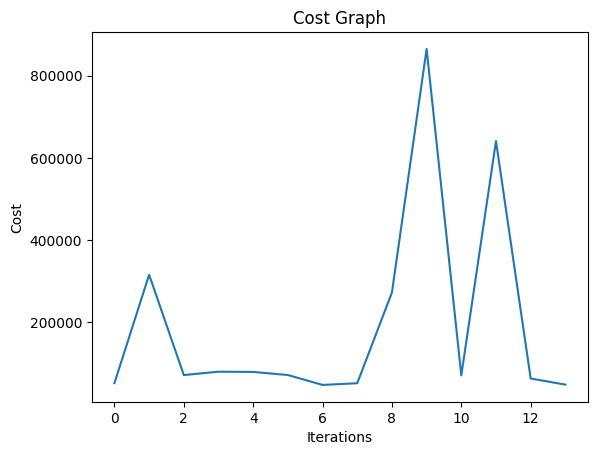

In [5]:
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Graph")
#plt.savefig('Results/' + save_folder + '/cost_graph.png')

[[ 0.5        -0.1         1.57079633]]
[[ 0.35       -0.15      ]
 [ 0.25162565 -0.27830311]
 [ 0.23377678 -0.43275141]
 [ 0.55341249 -0.35486842]
 [ 0.83168321 -0.13503807]
 [ 0.71042185  0.06538206]
 [ 0.55        0.15      ]]


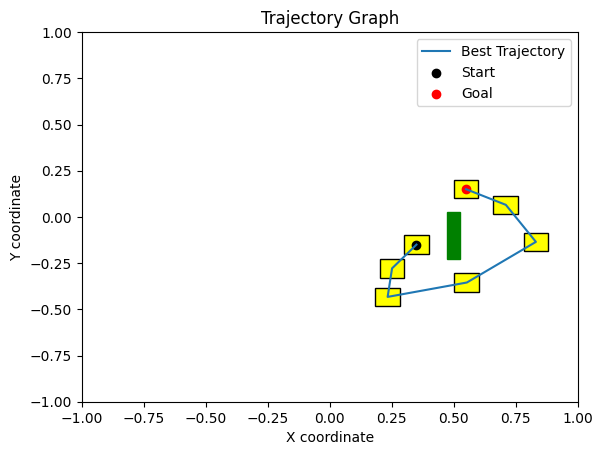

In [75]:
obs = np.load('obstacle_locations/complexscene1.npy')[0]
#obs = np.load('Results/' + save_folder + '/obstacle_config.npy')
#np.save('Results/' + save_folder + '/obstacle_config.npy', obs)

print(obs)
print(best_traj)
best_traj2 = traj_list[best_index2].copy()

plt.plot(best_traj[:, 0], best_traj[:, 1], label = 'Best Trajectory')
#plt.plot(best_traj2[:, 0], best_traj2[:, 1], label = 'Second Best Trajectory')
#plt.scatter(obs[:, 0], obs[:, 1], color = 'green', marker = 'o', label = 'Obstacles')

obs_l = 0.25
obs_b = 0.05

# for i in range(obs.shape[0]):
#     obstacle = plt.Circle((obs[i, 0], obs[i, 1]),
#                           0.025)
#     plt.gca().add_patch(obstacle)
    

for i in range(obs.shape[0]):
    
    
    obstacle = plt.Rectangle((obs[i, 0] - obs_l/2, obs[i, 1] - obs_b/2), 
                                obs_l, 
                                obs_b, 
                                color = 'green', 
                                angle = 90, #obs[i, 2] * 180/np.pi, 
                                rotation_point = 'center')

    plt.gca().add_patch(obstacle)

for i in range(best_traj.shape[0]):
    
    target = plt.Rectangle((best_traj[i, 0] - 0.1/2, best_traj[i, 1] - 0.1/2), 
                            0.1, 
                            0.1, 
                            facecolor = 'yellow',
                            edgecolor = 'black',
                            angle = 0, #best_traj[i, 2] * 180/np.pi, 
                            rotation_point = 'center')
    plt.gca().add_patch(target)

plt.scatter(0.35, -0.15, color = 'black', label = 'Start')
plt.scatter(0.55, 0.15, color = 'red', label = 'Goal')
#plt.scatter(best_traj[-1, 0], best_traj[-1, 1], color = 'red', label = 'Goal')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

leg = plt.legend()

# handles, labels = plt.get_legend_handles_labels()
# patch = mpatches.Patch(color='green', label='Obstacles')
# handles.append(patch) 

#plt.legend(handles=[patch])
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Trajectory Graph')

#plt.savefig('Results/' + save_folder + '/trajectory_graph.png')

plt.show()